In [1]:
# Import all the libraries we'll need
# 4 hypotheses: support or discard.
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom
%matplotlib inline

In [709]:
# load the dataframe
df = pd.read_csv('athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


# The following is just random exploration:

In [3]:
# What does Athletics mean?
athletics = df[df['Sport']=='Athletics']
athletics['Event'].value_counts()



# It means a lot of jumping and running

Athletics Men's Marathon                     2093
Athletics Men's 100 metres                   1936
Athletics Men's 4 x 100 metres Relay         1910
Athletics Men's 4 x 400 metres Relay         1749
Athletics Men's 200 metres                   1495
Athletics Men's 400 metres                   1417
Athletics Men's 800 metres                   1321
Athletics Women's 4 x 100 metres Relay       1174
Athletics Men's 1,500 metres                 1162
Athletics Women's 100 metres                 1063
Athletics Men's 5,000 metres                  982
Athletics Men's Long Jump                     954
Athletics Men's 110 metres Hurdles            896
Athletics Men's High Jump                     865
Athletics Men's 10,000 metres                 850
Athletics Men's Triple Jump                   847
Athletics Men's Discus Throw                  834
Athletics Men's 400 metres Hurdles            821
Athletics Men's 50 kilometres Walk            773
Athletics Women's 200 metres                  765


In [4]:
# Who's got the most gold medals?

gold = df[df['Medal']=='Gold']
gold['Team'].value_counts()



United States                  2474
Soviet Union                   1058
Germany                         679
Italy                           535
Great Britain                   519
France                          455
Sweden                          451
Hungary                         432
Canada                          422
East Germany                    369
Russia                          366
Australia                       342
China                           308
Norway                          299
Netherlands                     277
Japan                           247
South Korea                     211
Finland                         198
Denmark                         168
Cuba                            164
Romania                         161
West Germany                    155
Switzerland                     144
India                           138
Yugoslavia                      130
Unified Team                    123
Poland                          117
Spain                       

In [5]:
# How about recently? Maybe there's some correlation with developing countries.
gold_2000 = gold[gold['Year'] >= 2000]
gold_2000['Team'].value_counts()

# China moved from 13th place to 4th
# Brazil moved up too

United States                  674
Russia                         304
Germany                        260
China                          253
Canada                         223
Great Britain                  187
Australia                      184
France                         130
South Korea                    126
Netherlands                    123
Norway                         115
Italy                           94
Hungary                         89
Brazil                          78
Japan                           75
Argentina                       70
Sweden                          67
Cuba                            62
Denmark                         61
Romania                         61
Croatia                         42
Austria                         36
Ukraine                         36
Switzerland                     33
Jamaica                         30
Poland                          27
Spain                           26
New Zealand                     24
Belarus             

In [6]:
# Let's compare the top 3 gold winners
usa_gold = gold[gold['Team'] == 'United States']
rus_gold = gold[(gold['Team'] == 'Soviet Union') | (gold['Team'] == 'Russia')]
ger_gold = gold[(gold['Team'] == 'Germany')]

In [7]:
# Recent winnings
usa_gold2000 = gold[(gold['Team'] == 'United States') & (gold['Year'] >= 2000)]
rus_gold2000 = gold[((gold['Team'] == 'Soviet Union') | (gold['Team'] == 'Russia')) & (gold['Year'] >= 2000)]
ger_gold2000 = gold[(gold['Team'] == 'Germany') & (gold['Year'] >= 2000)]

In [8]:
# What events are we best at?
usa_gold['Event'].value_counts()

# Basketball

Basketball Men's Basketball                             186
Swimming Men's 4 x 200 metres Freestyle Relay           111
Swimming Men's 4 x 100 metres Medley Relay              108
Basketball Women's Basketball                            95
Rowing Men's Coxed Eights                                90
Athletics Men's 4 x 400 metres Relay                     81
Swimming Women's 4 x 100 metres Medley Relay             79
Swimming Women's 4 x 100 metres Freestyle Relay          78
Football Women's Football                                66
Athletics Men's 4 x 100 metres Relay                     63
Swimming Men's 4 x 100 metres Freestyle Relay            58
Athletics Women's 4 x 100 metres Relay                   50
Softball Women's Softball                                45
Athletics Women's 4 x 400 metres Relay                   38
Volleyball Men's Volleyball                              36
Ice Hockey Men's Ice Hockey                              36
Rowing Women's Coxed Eights             

In [9]:
# Recently?
usa_gold2000['Event'].value_counts()
# Women's basketball

Basketball Women's Basketball                      59
Football Women's Football                          51
Basketball Men's Basketball                        48
Swimming Men's 4 x 100 metres Medley Relay         39
Softball Women's Softball                          30
Athletics Women's 4 x 400 metres Relay             27
Swimming Men's 4 x 200 metres Freestyle Relay      27
Rowing Women's Coxed Eights                        27
Swimming Women's 4 x 200 metres Freestyle Relay    26
Water Polo Women's Water Polo                      25
Swimming Women's 4 x 100 metres Medley Relay       24
Baseball Men's Baseball                            24
Athletics Men's 4 x 400 metres Relay               18
Swimming Men's 4 x 100 metres Freestyle Relay      14
Volleyball Men's Volleyball                        12
Athletics Women's 4 x 100 metres Relay             11
Gymnastics Women's Team All-Around                 10
Rowing Men's Coxed Eights                           9
Equestrianism Mixed Jumping,

In [10]:
# How about Russia?
rus_gold['Event'].value_counts()

# Ice Hockey

Ice Hockey Men's Ice Hockey                            131
Gymnastics Women's Team All-Around                      56
Volleyball Men's Volleyball                             47
Volleyball Women's Volleyball                           46
Synchronized Swimming Women's Team                      44
Handball Men's Handball                                 43
Handball Women's Handball                               42
Football Men's Football                                 36
Gymnastics Men's Team All-Around                        33
Rhythmic Gymnastics Women's Group                       29
Biathlon Men's 4 x 7.5 kilometres Relay                 28
Fencing Men's Sabre, Team                               26
Fencing Women's Foil, Team                              25
Basketball Women's Basketball                           24
Basketball Men's Basketball                             24
Water Polo Men's Water Polo                             22
Fencing Men's Foil, Team                                

In [11]:
# Recently?
rus_gold2000['Event'].value_counts()

Synchronized Swimming Women's Team                     44
Rhythmic Gymnastics Women's Group                      29
Handball Men's Handball                                15
Handball Women's Handball                              15
Volleyball Men's Volleyball                            12
Figure Skating Mixed Team                              10
Synchronized Swimming Women's Duet                     10
Biathlon Women's 4 x 6 kilometres Relay                 8
Fencing Women's epee, Team                              8
Rhythmic Gymnastics Women's Individual                  5
Cross Country Skiing Women's 4 x 5 kilometres Relay     4
Athletics Women's 4 x 100 metres Relay                  4
Rowing Men's Quadruple Sculls                           4
Short Track Speed Skating Men's 5,000 metres Relay      4
Fencing Women's Sabre, Team                             4
Fencing Women's Foil, Team                              4
Modern Pentathlon Men's Individual                      4
Biathlon Men's

In [12]:
# Germany
ger_gold['Event'].value_counts()

# Hockey (Mens)

Hockey Men's Hockey                                              49
Equestrianism Mixed Dressage, Team                               23
Handball Men's Handball                                          22
Rowing Women's Quadruple Sculls                                  20
Rowing Men's Coxed Fours                                         20
Rowing Men's Coxed Eights                                        18
Football Women's Football                                        18
Equestrianism Mixed Jumping, Team                                17
Hockey Women's Hockey                                            16
Biathlon Men's 4 x 7.5 kilometres Relay                          16
Canoeing Women's Kayak Fours, 500 metres                         16
Rowing Men's Quadruple Sculls                                    16
Cycling Men's Team Pursuit, 4,000 metres                         14
Ski Jumping Men's Large Hill, Team                               12
Canoeing Men's Kayak Fours, 1,000 metres        

In [13]:
ger_gold2000['Event'].value_counts()

# Hockey still

Hockey Men's Hockey                                              33
Football Women's Football                                        18
Hockey Women's Hockey                                            16
Canoeing Women's Kayak Fours, 500 metres                         12
Rowing Women's Quadruple Sculls                                  12
Equestrianism Mixed Dressage, Team                               12
Equestrianism Mixed Three-Day Event, Team                        10
Speed Skating Women's Team Pursuit (6 laps)                       9
Rowing Men's Coxed Eights                                         9
Ski Jumping Men's Large Hill, Team                                8
Rowing Men's Quadruple Sculls                                     8
Canoeing Men's Canadian Doubles, 1,000 metres                     6
Cycling Men's Team Pursuit, 4,000 metres                          5
Canoeing Men's Kayak Doubles, 1,000 metres                        4
Luge Women's Singles                            

In [14]:
# India gold medals over time. Top sport is field hockey (130), Alpinism (7), Shooting 2008 (1)
# Last gold before 2008 was in 1980
gold[gold['Team']== 'India']['Sport'].value_counts().sort_index()

Alpinism      7
Hockey      130
Shooting      1
Name: Sport, dtype: int64

In [15]:
# ************ MISTAKE CORRECTED *********************************************************


# Have now realized that the 'Team' column data is a poor index because the data is messy.
# Using 'region' from this csv to categorize countries
noc_regions = pd.read_csv('noc_regions.csv')

In [16]:
# Merging
df = df.merge(noc_regions, on='NOC')

In [17]:
# Looking at the gold again with the corrected df
gold = df[df['Medal'] == 'Gold']
gold['region'].value_counts()

usa_gold = gold[gold['region'] == 'USA']
rus_gold = gold[(gold['region'] == 'Russia')]
ger_gold = gold[(gold['region'] == 'Germany')]

usa_gold2000 = gold[(gold['region'] == 'USA') & (gold['Year'] >= 2000)]
rus_gold2000 = gold[(gold['region'] =='Russia') & (gold['Year'] >= 2000)]
ger_gold2000 = gold[(gold['region'] == 'Germany') & (gold['Year'] >= 2000)]

In [18]:
# Top sports of all time USA, RUS, GER
usa_gold['Event'].value_counts()

# Still men's basketball

Basketball Men's Basketball                                    186
Swimming Men's 4 x 200 metres Freestyle Relay                  111
Swimming Men's 4 x 100 metres Medley Relay                     108
Rowing Men's Coxed Eights                                      108
Basketball Women's Basketball                                   95
Athletics Men's 4 x 400 metres Relay                            81
Swimming Women's 4 x 100 metres Medley Relay                    79
Swimming Women's 4 x 100 metres Freestyle Relay                 78
Football Women's Football                                       66
Athletics Men's 4 x 100 metres Relay                            63
Swimming Men's 4 x 100 metres Freestyle Relay                   58
Athletics Women's 4 x 100 metres Relay                          50
Softball Women's Softball                                       45
Athletics Women's 4 x 400 metres Relay                          38
Rowing Women's Coxed Eights                                   

In [19]:
# Gold winners before 2000
df[(df['Year'] < 2000) & (df['Medal'] == 'Gold')]['region'].value_counts()

# Same top 3

USA               1938
Russia            1279
Germany           1014
UK                 489
Italy              481
Sweden             412
France             369
Hungary            343
Norway             263
Canada             232
Finland            185
Australia          182
Japan              172
Netherlands        164
Switzerland        142
India              137
Serbia             131
Denmark            118
Czech Republic     106
Cuba               102
Romania            100
Belgium             94
South Korea         91
Poland              90
Spain               82
China               68
Austria             68
New Zealand         66
Greece              47
Bulgaria            46
                  ... 
Ireland              8
Estonia              7
Egypt                6
Iran                 5
Morocco              4
Kazakhstan           4
Luxembourg           4
Indonesia            4
Portugal             3
Algeria              3
Liechtenstein        2
Bahamas              2
Tunisia    

In [20]:
usa_gold2000['Event'].value_counts()

# Still women's basketball for 2000 - 2016

Basketball Women's Basketball                      59
Football Women's Football                          51
Basketball Men's Basketball                        48
Swimming Men's 4 x 100 metres Medley Relay         39
Softball Women's Softball                          30
Swimming Men's 4 x 200 metres Freestyle Relay      27
Rowing Women's Coxed Eights                        27
Athletics Women's 4 x 400 metres Relay             27
Swimming Women's 4 x 200 metres Freestyle Relay    26
Water Polo Women's Water Polo                      25
Swimming Women's 4 x 100 metres Medley Relay       24
Baseball Men's Baseball                            24
Athletics Men's 4 x 400 metres Relay               18
Swimming Men's 4 x 100 metres Freestyle Relay      14
Volleyball Men's Volleyball                        12
Athletics Women's 4 x 100 metres Relay             11
Gymnastics Women's Team All-Around                 10
Rowing Men's Coxed Eights                           9
Equestrianism Mixed Jumping,

In [21]:
rus_gold['Event'].value_counts()

# Still Hockey

Ice Hockey Men's Ice Hockey                                      153
Gymnastics Women's Team All-Around                                62
Handball Men's Handball                                           55
Volleyball Men's Volleyball                                       47
Volleyball Women's Volleyball                                     46
Synchronized Swimming Women's Team                                44
Handball Women's Handball                                         42
Gymnastics Men's Team All-Around                                  39
Football Men's Football                                           36
Basketball Women's Basketball                                     36
Fencing Men's Sabre, Team                                         31
Rhythmic Gymnastics Women's Group                                 29
Biathlon Men's 4 x 7.5 kilometres Relay                           28
Figure Skating Mixed Pairs                                        26
Fencing Women's Foil, Team        

In [22]:
rus_gold2000['Event'].value_counts()


Synchronized Swimming Women's Team                     44
Rhythmic Gymnastics Women's Group                      29
Handball Women's Handball                              15
Handball Men's Handball                                15
Volleyball Men's Volleyball                            12
Synchronized Swimming Women's Duet                     10
Figure Skating Mixed Team                              10
Biathlon Women's 4 x 6 kilometres Relay                 8
Fencing Women's epee, Team                              8
Figure Skating Mixed Pairs                              6
Rhythmic Gymnastics Women's Individual                  5
Athletics Women's 4 x 100 metres Relay                  4
Cross Country Skiing Women's 4 x 5 kilometres Relay     4
Modern Pentathlon Men's Individual                      4
Fencing Women's Sabre, Team                             4
Bobsleigh Men's Four                                    4
Short Track Speed Skating Men's 5,000 metres Relay      4
Biathlon Men's

In [23]:
ger_gold['Event'].value_counts()

Hockey Men's Hockey                                            67
Rowing Men's Coxed Eights                                      55
Rowing Men's Coxed Fours                                       40
Equestrianism Mixed Dressage, Team                             39
Handball Men's Handball                                        36
Bobsleigh Men's Four                                           32
Rowing Men's Quadruple Sculls                                  28
Rowing Women's Coxed Eights                                    27
Equestrianism Mixed Jumping, Team                              25
Rowing Women's Quadruple Sculls                                24
Rowing Men's Coxless Fours                                     24
Cycling Men's Team Pursuit, 4,000 metres                       23
Canoeing Women's Kayak Fours, 500 metres                       20
Luge Mixed (Men)'s Doubles                                     20
Football Women's Football                                      18
Swimming W

In [24]:
ger_gold2000['Event'].value_counts()

Hockey Men's Hockey                                              33
Football Women's Football                                        18
Hockey Women's Hockey                                            16
Equestrianism Mixed Dressage, Team                               15
Rowing Women's Quadruple Sculls                                  12
Canoeing Women's Kayak Fours, 500 metres                         12
Equestrianism Mixed Three-Day Event, Team                        10
Speed Skating Women's Team Pursuit (6 laps)                       9
Rowing Men's Coxed Eights                                         9
Rowing Men's Quadruple Sculls                                     8
Bobsleigh Men's Four                                              8
Ski Jumping Men's Large Hill, Team                                8
Canoeing Men's Canadian Doubles, 1,000 metres                     6
Bobsleigh Men's Two                                               6
Cycling Men's Team Pursuit, 4,000 metres        

In [25]:
# Who has won the most gold medals recently?
medal_diffs = df[(df['Year'] < 2000) & (df['Medal'] == 'Gold')]['region'].value_counts() - df[(df['Year'] >= 2000) & (df['Medal'] == 'Gold')]['region'].value_counts()
medal_diffs.sort_values(ascending=True)

# China, Brazil, and Argentina are top improved from 2000


China                         -215.0
Brazil                         -55.0
Argentina                      -49.0
South Korea                    -39.0
Croatia                        -26.0
Ukraine                        -25.0
Jamaica                        -22.0
Belarus                        -22.0
Slovakia                       -13.0
Kazakhstan                     -12.0
Bahamas                        -10.0
Iran                            -8.0
Uzbekistan                      -8.0
Mexico                          -8.0
Thailand                        -7.0
Ethiopia                        -6.0
Trinidad                        -5.0
Australia                       -4.0
Lithuania                       -4.0
Indonesia                       -3.0
Tunisia                         -1.0
North Korea                      0.0
Kenya                            0.0
Venezuela                        0.0
Armenia                          0.0
Uganda                           0.0
Algeria                          1.0
C

In [26]:
# Checking out the most improved teams

chn_gold = df[(df['region']=='China') & (df['Medal']=='Gold')]
brz_gold = df[(df['region']=='Brazil') & (df['Medal']=='Gold')]
agr_gold = df[(df['region']=='Argentina') & (df['Medal']=='Gold')]

chn_gold2000 = chn_gold[chn_gold['Year'] >= 2000]
brz_gold2000 = brz_gold[brz_gold['Year'] >= 2000]
agr_gold2000 = agr_gold[agr_gold['Year'] >= 2000]

In [27]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN
5,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 4 x 200 metres Freestyle Relay,NaN,China,NaN
6,3605,An Weijiang,M,22.0,178.0,72.0,China,CHN,2006 Winter,2006,Winter,Torino,Speed Skating,Speed Skating Men's 500 metres,NaN,China,NaN
7,3605,An Weijiang,M,22.0,178.0,72.0,China,CHN,2006 Winter,2006,Winter,Torino,Speed Skating,"Speed Skating Men's 1,000 metres",NaN,China,NaN
8,3610,An Yulong,M,19.0,173.0,70.0,China,CHN,1998 Winter,1998,Winter,Nagano,Short Track Speed Skating,Short Track Speed Skating Men's 500 metres,Silver,China,NaN
9,3610,An Yulong,M,19.0,173.0,70.0,China,CHN,1998 Winter,1998,Winter,Nagano,Short Track Speed Skating,"Short Track Speed Skating Men's 1,000 metres",NaN,China,NaN


In [28]:
# Cannot get distplot to work with nan values. Dropping all nan values.
dropped_na_df = df.dropna(subset = ['Age', 'Height', 'Weight'])


len(df) - len(dropped_na_df)  # Lost 64,856 rows out of 270,767. 205,911 still remain.

64856

In [29]:
dropped_na_df['Age'].value_counts() # 23 and 24 are most common ages of all competitors

23.0    17721
24.0    17526
22.0    16806
25.0    16270
21.0    15328
26.0    14487
27.0    13214
20.0    12126
28.0    11612
29.0     9286
19.0     9137
30.0     7543
18.0     6548
31.0     5959
32.0     4882
17.0     4275
33.0     3663
16.0     3193
34.0     2863
35.0     2129
15.0     1869
36.0     1713
37.0     1257
38.0      973
39.0      796
14.0      721
40.0      698
41.0      514
42.0      435
43.0      375
        ...  
45.0      252
46.0      214
47.0      178
13.0      155
48.0      151
49.0      126
50.0      114
52.0       85
51.0       73
53.0       63
54.0       52
56.0       37
12.0       27
55.0       23
57.0       20
60.0       18
58.0       17
61.0       14
59.0        9
65.0        7
62.0        6
63.0        6
11.0        6
66.0        6
69.0        2
67.0        2
64.0        2
70.0        2
71.0        1
68.0        1
Name: Age, Length: 61, dtype: int64

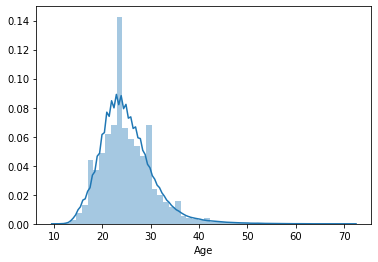

In [30]:
sns.distplot(dropped_na_df['Age'])

In [31]:
# Converting weight to lbs from kg.
# Want a df with height in inches, weight in lbs and a BMI

# Making backup copies of working df
dropped_na_df_copy = dropped_na_df.copy()


# First working on BMI

# Converting height to meters for BMI calculation
dropped_na_df_copy['Height'] = dropped_na_df_copy['Height']/100

# Making the BMI column
dropped_na_df_copy['BMI'] = dropped_na_df_copy['Weight']/(dropped_na_df_copy['Height']**2)

# Convert weight to lbs
dropped_na_df_copy['Weight'] = round(dropped_na_df_copy['Weight']*2.20462,1)

# Converting cm to inches
dropped_na_df_copy['Height'] = round(dropped_na_df_copy['Height']*100*0.393701,1)

dropped_na_df_copy # looks good

dropped_na_df = dropped_na_df_copy










In [32]:
dropped_na_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,BMI
0,1,A Dijiang,M,24.0,70.9,176.4,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,24.691358
1,2,A Lamusi,M,23.0,66.9,132.3,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,20.761246
2,602,Abudoureheman,M,22.0,71.7,165.3,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN,22.642193
3,1463,Ai Linuer,M,25.0,63.0,136.7,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN,24.218750
4,1464,Ai Yanhan,F,14.0,66.1,119.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN,19.132653
5,1464,Ai Yanhan,F,14.0,66.1,119.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 4 x 200 metres Freestyle Relay,NaN,China,NaN,19.132653
6,3605,An Weijiang,M,22.0,70.1,158.7,China,CHN,2006 Winter,2006,Winter,Torino,Speed Skating,Speed Skating Men's 500 metres,NaN,China,NaN,22.724403
7,3605,An Weijiang,M,22.0,70.1,158.7,China,CHN,2006 Winter,2006,Winter,Torino,Speed Skating,"Speed Skating Men's 1,000 metres",NaN,China,NaN,22.724403
8,3610,An Yulong,M,19.0,68.1,154.3,China,CHN,1998 Winter,1998,Winter,Nagano,Short Track Speed Skating,Short Track Speed Skating Men's 500 metres,Silver,China,NaN,23.388687
9,3610,An Yulong,M,19.0,68.1,154.3,China,CHN,1998 Winter,1998,Winter,Nagano,Short Track Speed Skating,"Short Track Speed Skating Men's 1,000 metres",NaN,China,NaN,23.388687


In [33]:
dropped_na_df['Weight'].value_counts() # 154 lbs is most common value

154.3    9534
132.3    7843
165.3    7701
149.9    7214
143.3    7167
158.7    6203
176.4    6179
160.9    5878
138.9    5821
141.1    5714
136.7    5558
127.9    5193
147.7    5147
172.0    4959
163.1    4731
145.5    4716
125.7    4602
180.8    4120
121.3    4064
167.6    4057
169.8    3996
152.1    3988
130.1    3965
123.5    3939
187.4    3899
134.5    3779
156.5    3577
119.0    3465
114.6    3417
198.4    3338
         ... 
109.1       3
270.1       3
223.8       3
305.3       3
241.4       2
237.0       2
113.5       2
287.7       2
323.0       2
471.8       2
401.2       2
261.2       2
256.8       2
303.1       2
230.4       2
239.2       2
281.1       2
389.1       2
335.1       2
267.9       2
294.3       2
368.2       2
418.9       1
436.5       1
392.4       1
332.9       1
396.8       1
385.8       1
328.5       1
106.9       1
Name: Weight, Length: 217, dtype: int64

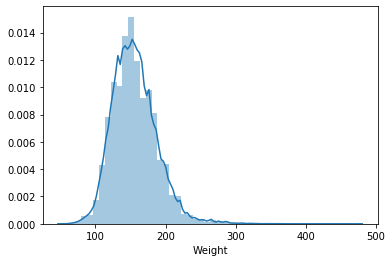

In [34]:
sns.distplot(dropped_na_df['Weight'])

In [35]:
dropped_na_df['Height'].value_counts() # 69 and 67 inches most common value

70.9    12151
66.9    11482
70.1    10383
68.9     9983
72.0     8033
66.1     7874
67.7     7679
68.1     7511
65.0     7030
72.8     6679
69.3     6319
71.7     6200
68.5     5998
65.7     5364
69.7     4831
74.0     4666
63.0     4614
67.3     4481
73.2     4477
71.3     4381
74.8     4353
72.4     4305
64.2     4236
66.5     4182
63.8     3936
70.5     3897
64.6     3841
65.4     3532
73.6     3405
76.0     2298
        ...  
56.7       99
56.3       77
81.5       65
82.7       64
55.1       56
83.9       53
83.1       50
54.7       48
82.3       46
53.5       28
55.5       25
54.3       20
83.5       19
84.6       19
53.9       18
84.3       15
53.1       14
85.8       13
85.0       12
85.4       11
52.0        7
50.0        7
52.4        6
86.6        6
87.8        4
87.0        4
89.0        3
86.2        2
51.2        2
50.4        1
Name: Height, Length: 94, dtype: int64

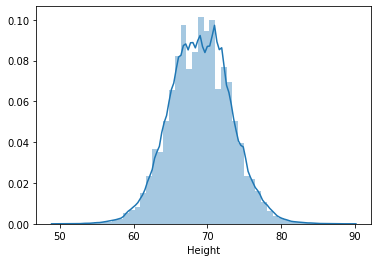

In [36]:
sns.distplot(dropped_na_df['Height'])

In [37]:
# Redfining top sports with new data frame that has dropped na values
gold = dropped_na_df[dropped_na_df['Medal'] == 'Gold']
gold['region'].value_counts()

usa_gold = gold[gold['region'] == 'USA']
rus_gold = gold[(gold['region'] == 'Russia')]
ger_gold = gold[(gold['region'] == 'Germany')]

usa_gold2000 = gold[(gold['region'] == 'USA') & (gold['Year'] >= 2000)]
rus_gold2000 = gold[(gold['region'] =='Russia') & (gold['Year'] >= 2000)]
ger_gold2000 = gold[(gold['region'] == 'Germany') & (gold['Year'] >= 2000)]

chn_gold = dropped_na_df[(dropped_na_df['region']=='China') & (dropped_na_df['Medal']=='Gold')]
brz_gold = df[(df['region']=='Brazil') & (df['Medal']=='Gold')]
agr_gold = df[(df['region']=='Argentina') & (df['Medal']=='Gold')]

chn_gold2000 = chn_gold[chn_gold['Year'] >= 2000]
brz_gold2000 = brz_gold[brz_gold['Year'] >= 2000]
agr_gold2000 = agr_gold[agr_gold['Year'] >= 2000]

In [38]:
dropped_na_df2000 = dropped_na_df[dropped_na_df['Year']>=2000]
dropped_na_df_before2000 = dropped_na_df[dropped_na_df['Year']<2000]

Text(0.5, 1.0, 'Kernel Density Estimation of Age for Top 3 Countries')

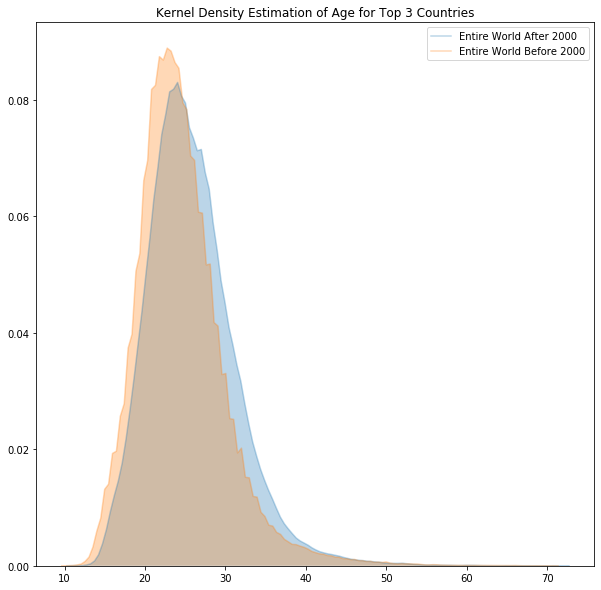

In [39]:
plt.figure(figsize=(10,10))
sns.kdeplot(dropped_na_df2000['Age'], label = 'Entire World After 2000', shade=True, alpha=0.3)
sns.kdeplot(dropped_na_df_before2000['Age'], label='Entire World Before 2000', shade=True, alpha=0.3)

plt.title('Kernel Density Estimation of Age for Top 3 Countries')

Text(0.5, 1.0, 'Kernel Density Estimation of Height for Top 3 Countries')

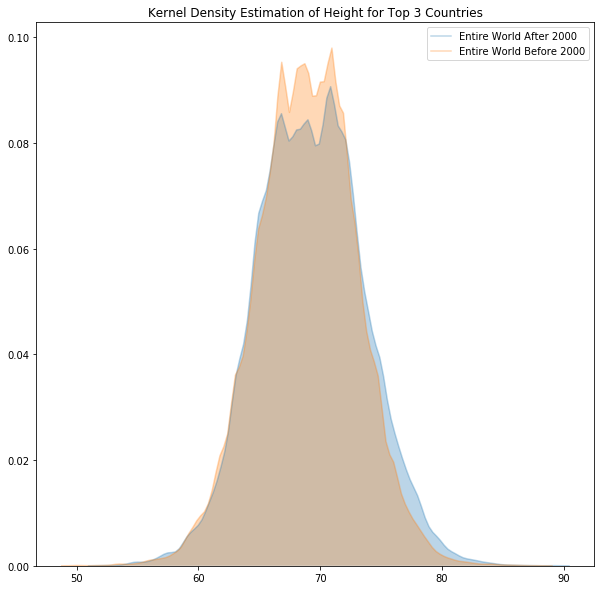

In [40]:
plt.figure(figsize=(10,10))
sns.kdeplot(dropped_na_df2000['Height'], label = 'Entire World After 2000', shade=True, alpha=0.3)
sns.kdeplot(dropped_na_df_before2000['Height'], label='Entire World Before 2000', shade=True, alpha=0.3)

plt.title('Kernel Density Estimation of Height for Top 3 Countries')

Text(0.5, 1.0, 'Kernel Density Estimation of Weight for Top 3 Countries')

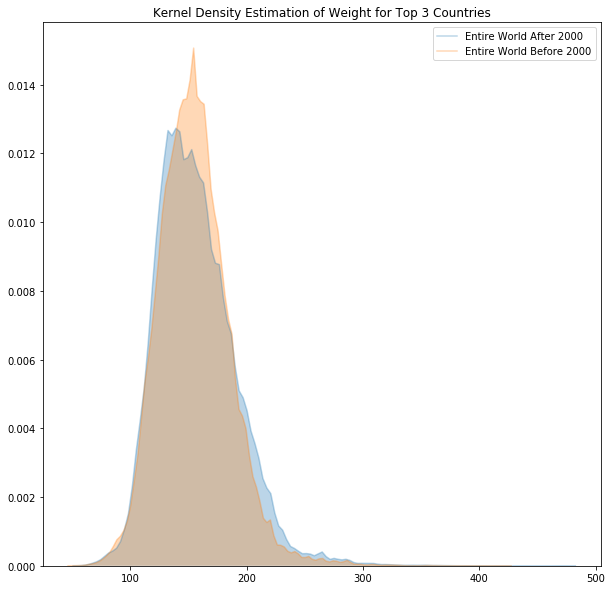

In [41]:
plt.figure(figsize=(10,10))
sns.kdeplot(dropped_na_df2000['Weight'], label = 'Entire World After 2000', shade=True, alpha=0.3)
sns.kdeplot(dropped_na_df_before2000['Weight'], label='Entire World Before 2000', shade=True, alpha=0.3)

plt.title('Kernel Density Estimation of Weight for Top 3 Countries')

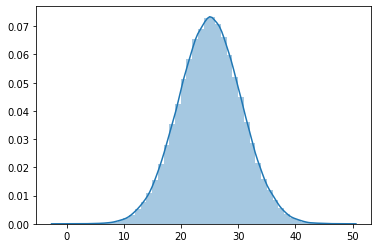

In [42]:
# Those are bad, but approimately normal. 
# Maybe we're better off assuming these things are normally distributed?
# This is where my lack of statistical knowledge is going to make me do things that
# probably don't make sense
mean_world_age = dropped_na_df['Age'].mean()
std_world_age = dropped_na_df['Age'].std()

mean_world_height = dropped_na_df['Height'].mean()
std_world_height = dropped_na_df['Height'].std()

mean_world_weight = dropped_na_df['Weight'].mean()
std_world_weight = dropped_na_df['Weight'].std()

norm_dist_world_age = np.random.normal(mean_world_age,std_world_age, len(dropped_na_df['Age'])) 
sns.distplot(norm_dist_world_age)

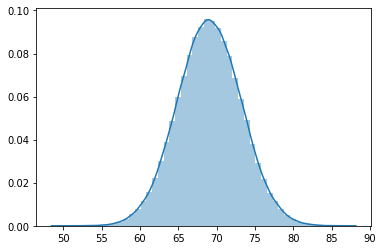

In [43]:
norm_dist_world_height = np.random.normal(mean_world_height,std_world_height, len(dropped_na_df['Height'])) 
sns.distplot(norm_dist_world_height)

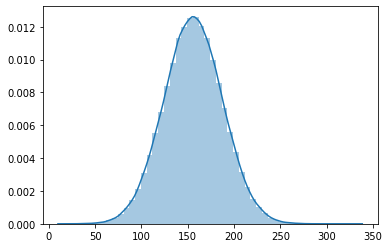

In [44]:
norm_dist_world_weight = np.random.normal(mean_world_weight,std_world_weight, len(dropped_na_df['Weight'])) 
sns.distplot(norm_dist_world_weight)

In [45]:
# Doing the same for USA, GER, and RUS
# USA
mean_usa_age = dropped_na_df[dropped_na_df['region']=='USA']['Age'].mean()
std_usa_age = dropped_na_df[dropped_na_df['region']=='USA']['Age'].std()

mean_usa_height = dropped_na_df[dropped_na_df['region']=='USA']['Height'].mean()
std_usa_height = dropped_na_df[dropped_na_df['region']=='USA']['Height'].std()

mean_usa_weight = dropped_na_df[dropped_na_df['region']=='USA']['Weight'].mean()
std_usa_weight = dropped_na_df[dropped_na_df['region']=='USA']['Weight'].std()

norm_dist_usa_age = np.random.normal(mean_usa_age, std_usa_age, len(dropped_na_df[dropped_na_df['region']=='USA']['Age'])) 
norm_dist_usa_weight = np.random.normal(mean_usa_weight, std_usa_weight, len(dropped_na_df[dropped_na_df['region']=='USA']['Weight'])) 
norm_dist_usa_height = np.random.normal(mean_usa_height, std_usa_height, len(dropped_na_df[dropped_na_df['region']=='USA']['Height'])) 

# RUS
mean_rus_age = dropped_na_df[dropped_na_df['region']=='Russia']['Age'].mean()
std_rus_age = dropped_na_df[dropped_na_df['region']=='Russia']['Age'].std()

mean_rus_height = dropped_na_df[dropped_na_df['region']=='Russia']['Height'].mean()
std_rus_height = dropped_na_df[dropped_na_df['region']=='Russia']['Height'].std()

mean_rus_weight = dropped_na_df[dropped_na_df['region']=='Russia']['Weight'].mean()
std_rus_weight = dropped_na_df[dropped_na_df['region']=='Russia']['Weight'].std()

norm_dist_rus_age = np.random.normal(mean_rus_age, std_rus_age, len(dropped_na_df[dropped_na_df['region']=='Russia']['Age'])) 
norm_dist_rus_weight = np.random.normal(mean_rus_weight, std_usa_weight, len(dropped_na_df[dropped_na_df['region']=='Russia']['Weight'])) 
norm_dist_rus_height = np.random.normal(mean_usa_height, std_usa_height, len(dropped_na_df[dropped_na_df['region']=='Russia']['Height'])) 
# GER
mean_ger_age = dropped_na_df[dropped_na_df['region']=='Germany']['Age'].mean()
std_ger_age = dropped_na_df[dropped_na_df['region']=='Germany']['Age'].std()

mean_ger_height = dropped_na_df[dropped_na_df['region']=='Germany']['Height'].mean()
std_ger_height = dropped_na_df[dropped_na_df['region']=='Germany']['Height'].std()

mean_ger_weight = dropped_na_df[dropped_na_df['region']=='Germany']['Weight'].mean()
std_ger_weight = dropped_na_df[dropped_na_df['region']=='Germany']['Weight'].std()

norm_dist_ger_age = np.random.normal(mean_ger_age, std_ger_age, len(dropped_na_df[dropped_na_df['region']=='Germany']['Age'])) 
norm_dist_ger_weight = np.random.normal(mean_ger_weight, std_ger_weight, len(dropped_na_df[dropped_na_df['region']=='Germany']['Weight'])) 
norm_dist_ger_height = np.random.normal(mean_ger_height, std_ger_height, len(dropped_na_df[dropped_na_df['region']=='Germany']['Height'])) 





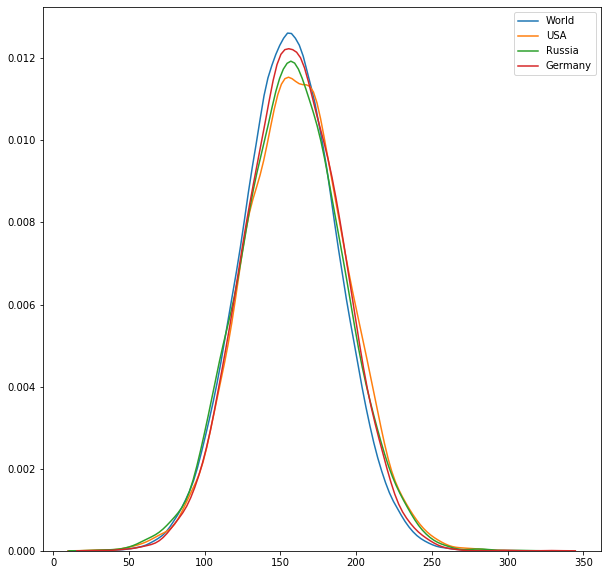

In [46]:
# Checking these out with kde plots
plt.figure(figsize=(10,10))
sns.kdeplot(norm_dist_world_weight, label='World')
sns.kdeplot(norm_dist_usa_weight, label = 'USA')
sns.kdeplot(norm_dist_rus_weight, label = 'Russia')
sns.kdeplot(norm_dist_ger_weight, label = 'Germany')
plt.legend()

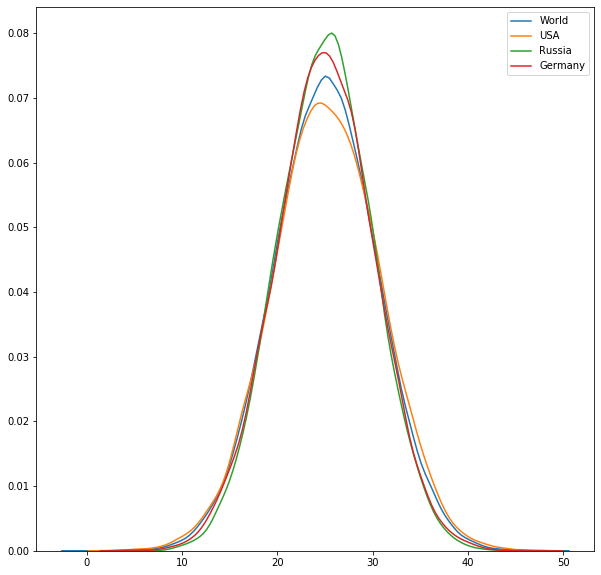

In [47]:
plt.figure(figsize=(10,10))
sns.kdeplot(norm_dist_world_age, label='World')
sns.kdeplot(norm_dist_usa_age, label = 'USA')
sns.kdeplot(norm_dist_rus_age, label = 'Russia')
sns.kdeplot(norm_dist_ger_age, label = 'Germany')
plt.legend()

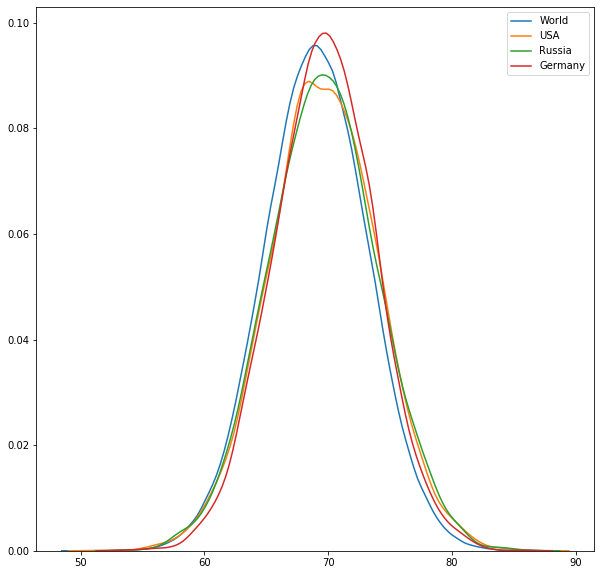

In [48]:
plt.figure(figsize=(10,10))
sns.kdeplot(norm_dist_world_height, label='World')
sns.kdeplot(norm_dist_usa_height, label = 'USA')
sns.kdeplot(norm_dist_rus_height, label = 'Russia')
sns.kdeplot(norm_dist_ger_height, label = 'Germany')
plt.legend()

In [49]:
# Seeing what's going on with the female athletes

women_df = dropped_na_df[(dropped_na_df['Sex']=='F') & (dropped_na_df['Medal']=='Gold') ]
women_df2000 = women_df[women_df['Year']>=2000]


In [50]:
women_df['region'].value_counts()

USA               784
Russia            528
Germany           419
China             211
Australia         172
Canada            156
Netherlands       119
Romania           118
South Korea        85
UK                 79
Japan              71
Norway             61
Italy              60
Hungary            49
France             48
Denmark            38
Cuba               34
Sweden             33
Brazil             31
Spain              29
Ukraine            27
Czech Republic     23
Serbia             19
Austria            18
Poland             18
Zimbabwe           17
Switzerland        15
Finland            15
Bulgaria           14
New Zealand        13
                 ... 
Kazakhstan          5
Thailand            5
Kenya               5
Slovakia            4
Slovenia            4
Ireland             4
Belgium             4
Colombia            4
South Africa        3
Lithuania           3
Estonia             3
Cameroon            2
Turkey              2
Taiwan              2
Liechtenst

In [51]:
difference_women_2000 = women_df['region'].value_counts()-women_df2000['region'].value_counts()
women_df2000['region'].value_counts()

USA               387
Russia            178
China             169
Germany           133
Canada            109
Australia         108
Netherlands        84
UK                 69
Romania            56
South Korea        53
Norway             49
Japan              43
Italy              36
Denmark            31
Brazil             29
Hungary            27
Ukraine            22
Sweden             21
France             19
Cuba               13
Jamaica            12
New Zealand        11
Belarus            10
Czech Republic     10
Spain               9
Poland              8
Bahamas             8
Switzerland         8
Ethiopia            8
Croatia             7
Greece              6
Austria             6
Kazakhstan          5
Kenya               5
Thailand            5
North Korea         5
Slovakia            4
Slovenia            4
Colombia            4
Bulgaria            4
Belgium             3
Lithuania           3
Estonia             2
Cameroon            2
Argentina           2
Turkey    

In [52]:
women_df[women_df['region'] == 'Costa Rica']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,BMI
223027,95868,Claudia Mara Poll Ahrens,F,23.0,75.2,167.6,Costa Rica,CRC,1996 Summer,1996,Summer,Atlanta,Swimming,Swimming Women's 200 metres Freestyle,Gold,Costa Rica,NaN,20.832762


In [53]:
women_df['region'].value_counts() - women_df2000['region'].value_counts()

Algeria             1.0
Argentina           0.0
Australia          64.0
Austria            12.0
Azerbaijan          0.0
Bahamas             0.0
Bahrain             0.0
Belarus             1.0
Belgium             1.0
Brazil              2.0
Bulgaria           10.0
Cameroon            0.0
Canada             47.0
China              42.0
Colombia            0.0
Costa Rica          NaN
Croatia             0.0
Cuba               21.0
Czech Republic     13.0
Denmark             7.0
Estonia             1.0
Ethiopia            2.0
Finland            14.0
France             29.0
Germany           286.0
Greece              1.0
Hungary            22.0
Indonesia           0.0
Ireland             3.0
Italy              24.0
                  ...  
Mexico              0.0
Morocco             NaN
Mozambique          0.0
Netherlands        35.0
New Zealand         2.0
Nigeria             NaN
North Korea         1.0
Norway             12.0
Poland             10.0
Portugal            NaN
Puerto Rico     

In [54]:
# Ok. BMI. Splitting the world up between years 1900 and 1916 and 2000 and 2016
# Body Mass Index is weight in kg divided by height in meters squared


In [55]:
df_bmi_1900 = dropped_na_df[(dropped_na_df['Year']>=1900) & (dropped_na_df['Year'] <= 1916)]['BMI']

In [56]:
df_bmi_2000 = dropped_na_df[(dropped_na_df['Year']>=2000) & (dropped_na_df['Year'] <= 2016)]['BMI']

In [57]:
df_bmi_1900_mean = df_bmi_1900.mean()

In [58]:
df_bmi_2000_mean = df_bmi_2000.mean()

In [59]:
df_bmi_1900_std = df_bmi_1900.std()

In [60]:
df_bmi_2000_std = df_bmi_2000.std()

In [61]:
norm_bmi_1900 = np.random.normal(df_bmi_1900_mean, df_bmi_1900_std, len(df_bmi_1900))
norm_bmi_2000 = np.random.normal(df_bmi_2000_mean, df_bmi_2000_std, len(df_bmi_2000))


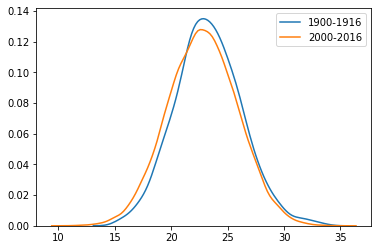

In [62]:
sns.kdeplot(norm_bmi_1900, label='1900-1916' )
sns.kdeplot(norm_bmi_2000, label = '2000-2016')

In [711]:
world_heights_1900 = dropped_na_df[(dropped_na_df['Year'] >= 1900) & (dropped_na_df['Year'] <= 1916)]['Height']
world_heights_2000 = dropped_na_df[(dropped_na_df['Year'] >= 2000) & (dropped_na_df['Year'] <= 2016)]['Height']

In [712]:
world_weights_1900 = dropped_na_df[(dropped_na_df['Year']>=1900) & (dropped_na_df['Year'] <= 1916)]['Weight']
world_weights_2000 = dropped_na_df[(dropped_na_df['Year']>=2000) & (dropped_na_df['Year'] <= 2016)]['Weight']

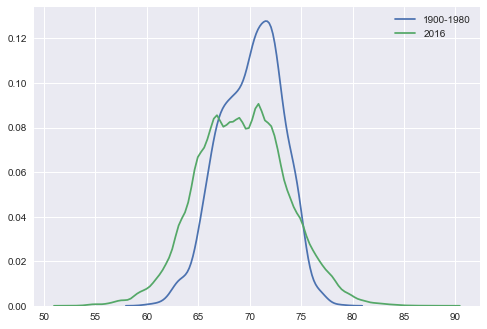

In [713]:
sns.kdeplot(world_heights_1900, label='1900-1980')
sns.kdeplot(world_heights_2000, label='2016')

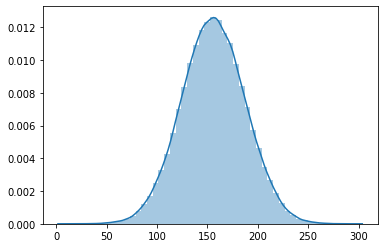

In [66]:
norm_dist_world_weight = np.random.normal(mean_world_weight,std_world_weight, len(dropped_na_df['Weight'])) 
sns.distplot(norm_dist_world_weight)

In [67]:
len(world_heights_1900)

11473

In [68]:
len(world_heights_2000)

13411

In [69]:
len(dropped_na_df[dropped_na_df['Year']==2016])

13411

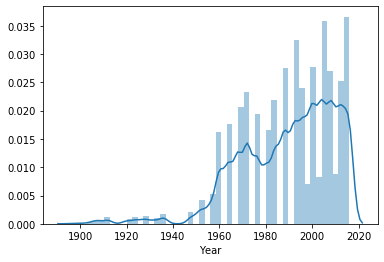

In [70]:
# What does our data distribution even look like by year
sns.distplot(dropped_na_df['Year'])

In [71]:
# Sparse at the front. Ok.
dropped_na_df['Birth Year'] = dropped_na_df['Year']-dropped_na_df['Age']
dropped_na_df['Birth Year'] = dropped_na_df['Birth Year'].astype(int)

In [72]:
# Maybe by generation?

# Gen Z, iGen, or Centennials: Born 1996 – TBD
# Millennials or Gen Y: Born 1977 – 1995
# Generation X: Born 1965 – 1976
# Baby Boomers: Born 1946 – 1964
# Traditionalists or Silent Generation: Born 1945 and before

df_main = dropped_na_df[dropped_na_df['Year'] >=1960]

In [73]:
df_main['Birth Year'].value_counts().sort_index()

1895       1
1896       2
1898       1
1899       1
1900       2
1901       1
1902       4
1903       4
1904       4
1905       5
1906      10
1907       6
1908      16
1909       6
1910      15
1911      16
1912      27
1913      20
1914      37
1915      31
1916      40
1917      31
1918      67
1919      38
1920      83
1921      75
1922      53
1923     103
1924     127
1925     161
        ... 
1974    4289
1975    4163
1976    4508
1977    4255
1978    4500
1979    4263
1980    4141
1981    4476
1982    4199
1983    4221
1984    4024
1985    4204
1986    3928
1987    3780
1988    3625
1989    3373
1990    2938
1991    2570
1992    2297
1993    1863
1994    1571
1995    1081
1996     811
1997     570
1998     279
1999     183
2000     113
2001      21
2002      10
2003       2
Name: Birth Year, Length: 108, dtype: int64

In [74]:
generational_df = df_main[df_main['Birth Year']>= 1946]

In [75]:
generational_df['Year'].value_counts().sort_index()

1960       25
1964      692
1968     4276
1972     8184
1976     8616
1980     7971
1984    10643
1988    13480
1992    13047
1994     2971
1996    11791
1998     3518
2000    13656
2002     4060
2004    13377
2006     4365
2008    13364
2010     4378
2012    12487
2014     4673
2016    13411
Name: Year, dtype: int64

In [719]:
dropped_na_df[(dropped_na_df['Sex']=='F') & (dropped_na_df['Year']==2016)]['Age'].value_counts().sort_index()

13.0      2
14.0      9
15.0     20
16.0    106
17.0    138
18.0    167
19.0    250
20.0    297
21.0    378
22.0    448
23.0    457
24.0    481
25.0    482
26.0    428
27.0    459
28.0    416
29.0    332
30.0    275
31.0    199
32.0    166
33.0    140
34.0    110
35.0     78
36.0     71
37.0     38
38.0     33
39.0     14
40.0     13
41.0     14
42.0     15
43.0     11
44.0      8
45.0      6
46.0      3
47.0     12
48.0      4
49.0      2
50.0      4
51.0      3
52.0      4
53.0      1
54.0      1
56.0      1
60.0      2
61.0      2
62.0      1
Name: Age, dtype: int64

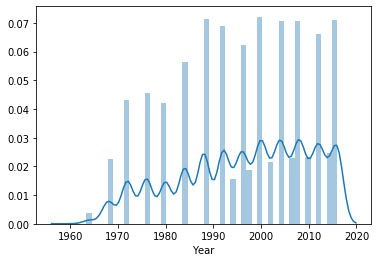

In [76]:
sns.distplot(generational_df['Year'])

In [720]:
# Maybe check it out by generation?

# Gen Z, iGen, or Centennials: Born 1996 – TBD
# Millennials or Gen Y: Born 1977 – 1995
# Generation X: Born 1965 – 1976
# Baby Boomers: Born 1946 – 1964
# Traditionalists or Silent Generation: Born 1945 and before



In [80]:
generational_df.loc[generational_df['Birth Year'] <= 1964, 'Generation'] = 'Baby Boomer'

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [81]:
generational_df.loc[(generational_df['Birth Year'] > 1964) & (generational_df['Birth Year'] <= 1976), 'Generation'] = 'Generation X'

In [82]:
generational_df.loc[(generational_df['Birth Year'] > 1976) & (generational_df['Birth Year'] <= 1995), 'Generation'] = 'Millennial'

In [83]:
generational_df.loc[(generational_df['Birth Year'] > 1995), 'Generation'] = 'Centennial'

In [84]:
# for index, birth_year in enumerate(generational_df['Birth Year']):
    
#     if birth_year <= 1964:
#         generational_df['Generation'][index] = 'Baby Boomer'
        
#     elif birth_year <= 1976:
#         generational_df['Generation'][index] = 'Generation X'
        
#     elif birth_year <= 1995:
#         generational_df['Generation'][index] = 'Millenial'
#     else:
#         generational_df['Generation'][index] = 'Centennial'
        
# THIS IS BAD. Forget this.

In [721]:
# How many of each are there?
generational_df['Generation'].value_counts()

Millennial      65309
Baby Boomer     51166
Generation X    50521
Centennial       1989
Name: Generation, dtype: int64

In [86]:
# get gold winners from each generation 
gold_millenials = generational_df[(generational_df['Medal']=='Gold') & (generational_df['Generation'] == 'Millennial') ]

In [87]:
len(gold_millenials)

2980

In [88]:
gold_baby_boomers = generational_df[(generational_df['Medal']=='Gold') & (generational_df['Generation'] == 'Baby Boomer') ]

In [89]:
len(gold_baby_boomers)

2603

In [90]:
gold_gen_x = generational_df[(generational_df['Medal']=='Gold') & (generational_df['Generation'] == 'Generation X') ]

In [91]:
len(gold_gen_x)

2355

In [92]:
gold_cent = generational_df[(generational_df['Medal']=='Gold') & (generational_df['Generation'] == 'Centennial') ]

In [93]:
len(gold_cent)

71

In [97]:
df_main

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,BMI,Birth Year
0,1,A Dijiang,M,24.0,70.9,176.4,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,24.691358,1968
1,2,A Lamusi,M,23.0,66.9,132.3,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,20.761246,1989
2,602,Abudoureheman,M,22.0,71.7,165.3,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN,22.642193,1978
3,1463,Ai Linuer,M,25.0,63.0,136.7,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN,24.218750,1979
4,1464,Ai Yanhan,F,14.0,66.1,119.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN,19.132653,2002
5,1464,Ai Yanhan,F,14.0,66.1,119.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 4 x 200 metres Freestyle Relay,NaN,China,NaN,19.132653,2002
6,3605,An Weijiang,M,22.0,70.1,158.7,China,CHN,2006 Winter,2006,Winter,Torino,Speed Skating,Speed Skating Men's 500 metres,NaN,China,NaN,22.724403,1984
7,3605,An Weijiang,M,22.0,70.1,158.7,China,CHN,2006 Winter,2006,Winter,Torino,Speed Skating,"Speed Skating Men's 1,000 metres",NaN,China,NaN,22.724403,1984
8,3610,An Yulong,M,19.0,68.1,154.3,China,CHN,1998 Winter,1998,Winter,Nagano,Short Track Speed Skating,Short Track Speed Skating Men's 500 metres,Silver,China,NaN,23.388687,1979
9,3610,An Yulong,M,19.0,68.1,154.3,China,CHN,1998 Winter,1998,Winter,Nagano,Short Track Speed Skating,"Short Track Speed Skating Men's 1,000 metres",NaN,China,NaN,23.388687,1979


# Have Atheletes physically changed over time? BMI as measure
Looking at populations of athletes between the years 1900-1916 to compare to the populations of 2000-2016 to see if BMI has changed.
Grabbing the relevant data


In [618]:
df_1900 = dropped_na_df[(dropped_na_df['Year'] >=1900) & (dropped_na_df['Year'] <= 1916)]
df_2000 = dropped_na_df[(dropped_na_df['Year'] >=2000) & (dropped_na_df['Year'] <= 2016)]

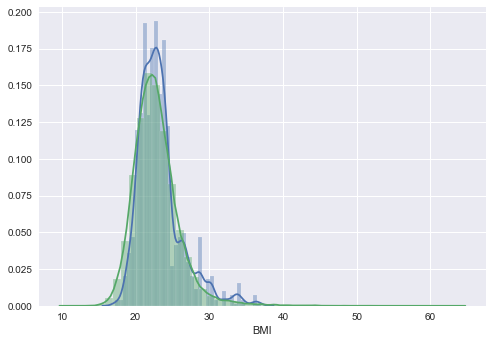

In [619]:
# Looking at the populations
sns.distplot(df_1900['BMI'])
sns.distplot(df_2000['BMI'])

Taking random samples from each population and averaging BMI from each sample. Using this to compare the two populations.

In [620]:
len(df_1900)

1308

In [621]:
len(df_2000)

83777

In [622]:
# getting the population mean and std for 1900-1916
pop_mean1900 = df_1900['BMI'].mean()
pop_std1900 = df_1900['BMI'].std()
pop_mean1900

23.26618493684122

In [623]:
# Taking our sample 
sample_of_thirty_2000 = df_2000['BMI'].sample(n=30)

In [624]:
sample_of_thirty_2000_mean = np.mean(sample_of_thirty_2000)
sample_of_thirty_2000_mean

22.790559479644706

In [625]:
sample_of_thirty_2000_se = pop_std1900/np.sqrt(len(sample_of_thirty_2000))

In [626]:
z = (sample_of_thirty_2000_mean - pop_mean1900)/
z

-0.872723536543089

In [627]:
import scipy.stats as stats

In [628]:
p = 1 - stats.norm.sf(z)
p

0.1914068928053363

In [629]:
BMI_avgs_samples1900 = []
BMI_avgs_samples2000 = []

for index in range(10000):
    samples1900 = df_1900['BMI'].sample(n=100)
    samples2000 = df_2000['BMI'].sample(n=100)
    mean_1900 = samples1900.mean()
    mean_2000 = samples2000.mean()
    BMI_avgs_samples1900.append(mean_1900)
    BMI_avgs_samples2000.append(mean_2000)
    
      

mean_BMI1900 = np.mean(BMI_avgs_samples1900)
mean_BMI2000 = np.mean(BMI_avgs_samples2000)
std_BMI1900 = np.std(BMI_avgs_samples1900)
std_BMI2000 = np.std(BMI_avgs_samples2000)

print('mean1900: ', mean_BMI1900 )
print('mean2000: ', mean_BMI2000)
print('std_1900: ', std_BMI1900)
print('std_2000: ' , std_BMI2000)

BMI_dist_1900 = np.random.normal(mean_BMI1900, std_BMI1900, 1000)
BMI_dist_2000 = np.random.normal(mean_BMI2000, std_BMI2000, 1000)

mean1900:  23.26187611356854
mean2000:  22.782702088575174
std_1900:  0.2828328622582412
std_2000:  0.3074152058099046


In [630]:
len(BMI_avgs_samples1900)

10000

In [631]:
len(BMI_avgs_samples2000)

10000

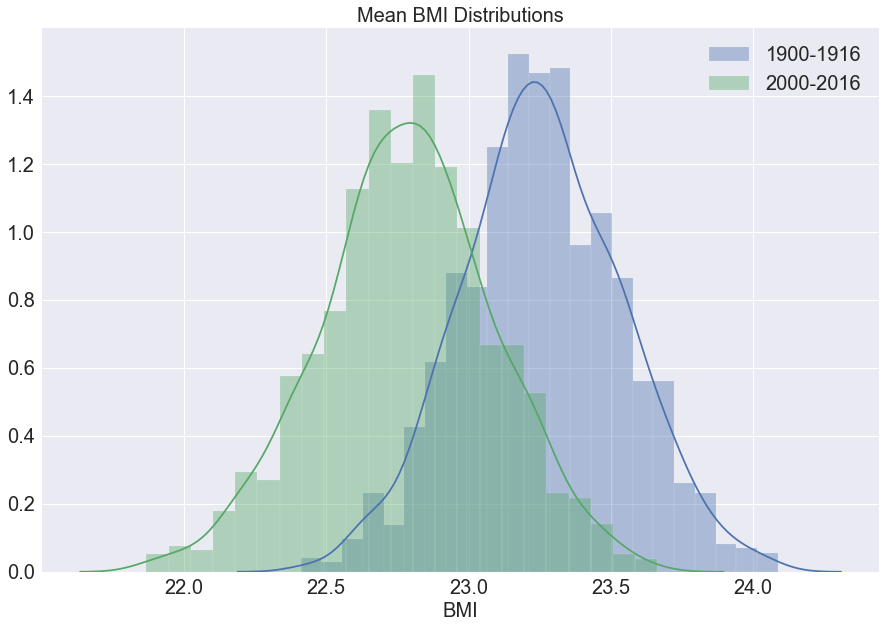

In [632]:
fig = plt.figure(figsize = (15, 10))
sns.distplot(BMI_dist_1900, label = '1900-1916', kde=True)
sns.distplot(BMI_dist_2000, label = '2000-2016', kde=True)
plt.title('Mean BMI Distributions', fontsize = 20)
plt.xlabel('BMI', fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 20})

# There is a significant difference. What are some reasons?

In [633]:
df_1900[df_1900['Sex']=='F']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,BMI,Birth Year


No women particiated in the Olymipics from 1900-1916 according to our data (Wikipedia says that the first female
athlete participated in the 1900 Olympics)

In [634]:
dropped_na_df[(dropped_na_df['Sex']=='F')]['Year'].value_counts().sort_index()

1920       1
1924       7
1928      56
1932      57
1936      88
1948     137
1952     417
1956     525
1960    1516
1964    1643
1968    2169
1972    2491
1976    2462
1980    2049
1984    2885
1988    4001
1992    4079
1994    1023
1996    4234
1998    1350
2000    5373
2002    1555
2004    5521
2006    1753
2008    5716
2010    1837
2012    5631
2014    1920
2016    6101
Name: Year, dtype: int64

# Comparing male BMI for athletes from the two eras

In [635]:
male2000_df = dropped_na_df2000[dropped_na_df2000['Sex']=='M']
male2000_df['Year'].value_counts()

2000    8286
2004    7856
2008    7650
2016    7310
2012    6857
2014    2753
2006    2612
2010    2541
2002    2505
Name: Year, dtype: int64

In [636]:
# Taking our sample 

p_values = []

for i in range(10000):
    sample_m_2000 = male2000_df['BMI'].sample(n=30)
    sample_m_2000_mean = np.mean(sample_m_2000)
    sample_m_2000_se = pop_std1900/np.sqrt(len(sample_m_2000))
    z = (sample_m_2000_mean - pop_mean1900)/sample_m_2000_se
    p = 1 - stats.norm.sf(z)
    p_values.append(p)

In [644]:
p_values_arr = np.array(p_values)
p_values_arr[p_values_arr < 0.05]

array([0.04898388, 0.02351239, 0.0196743 ])

In [639]:
mean_BMI2000 = male2000_df['BMI'].mean()
std_BMI2000 = male2000_df['BMI'].std()

BMI_dist_2000 = np.random.normal(mean_BMI2000, std_BMI2000, 10000)
BMI_dist_1900

array([23.31853564, 23.13211401, 23.42970244, 23.19681144, 23.08355454,
       23.39378328, 23.23522984, 23.00132708, 23.67678604, 23.65013933,
       22.95237513, 23.19328864, 23.68009037, 24.02326573, 23.13478054,
       23.09337311, 23.30311121, 23.24511486, 23.30702426, 23.60001157,
       23.20138504, 23.47635764, 23.35915244, 23.28016281, 23.43242617,
       23.22803472, 22.80320687, 23.48272892, 23.86699938, 23.39695978,
       22.90050933, 23.58770564, 23.31354159, 22.95188708, 23.10762335,
       23.18037142, 23.24878679, 23.57231851, 23.56839037, 23.24716273,
       23.1418657 , 23.27879076, 23.51239134, 23.38260815, 23.215242  ,
       23.00609151, 23.2490565 , 23.32457751, 22.91438944, 22.98339455,
       23.65902936, 23.85737612, 23.07493433, 23.55329837, 22.96125505,
       23.18367971, 23.46508907, 22.68384401, 23.57651919, 22.83729615,
       23.16795033, 23.45827301, 23.5348103 , 23.50676186, 23.47310676,
       22.63152257, 23.37907773, 23.47162437, 23.08658771, 23.26

In [640]:
mean_BMI2000

23.787136059578533

In [641]:
mean_BMI1900

23.26187611356854

In [642]:
d = mean_BMI2000-mean_BMI1900
d

0.5252599460099923

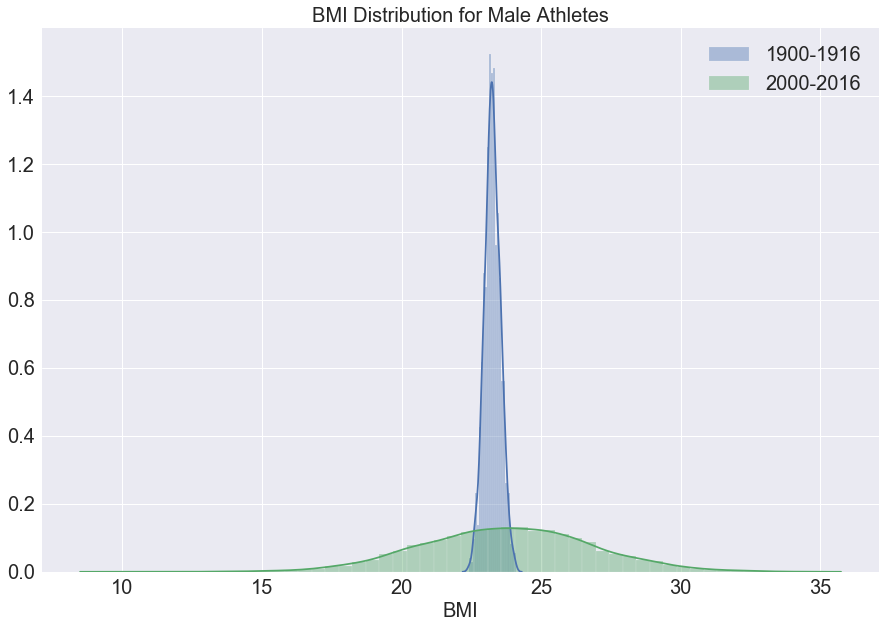

In [643]:
fig = plt.figure(figsize = (15, 10))
sns.distplot(BMI_dist_1900, label = '1900-1916')
sns.distplot(BMI_dist_2000, label = '2000-2016')
plt.title('BMI Distribution for Male Athletes', fontsize=20)
plt.xlabel('BMI', fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 20})


In [394]:
host_usa_df = dropped_na_df[(dropped_na_df['City']=='Atlanta') 
                            | (dropped_na_df['City']=='Los Angeles') | (dropped_na_df['City']=='Salt Lake City')
                            | (dropped_na_df['City']=='St. Louis') | (dropped_na_df['City']=='Lake Placid') 
                            | (dropped_na_df['City']=='Squaw Valley')]

In [395]:
usa_home = host_usa_df[host_usa_df['region']=='USA']

In [396]:
guest_usa_df = dropped_na_df[(dropped_na_df['City']!='Atlanta') 
                            & (dropped_na_df['City']!='Los Angeles') & (dropped_na_df['City']!='Salt Lake City')
                            & (dropped_na_df['City']!='St. Louis') & (dropped_na_df['City']!='Lake Placid') 
                            & (dropped_na_df['City']!='Squaw Valley')]
guest_usa_df['City'].value_counts()

London                    13768
Sydney                    13659
Athina                    13618
Rio de Janeiro            13411
Beijing                   13366
Seoul                     11591
Barcelona                 10310
Munich                     9838
Mexico City                8396
Montreal                   8261
Roma                       7521
Tokyo                      7368
Moskva                     6843
Sochi                      4673
Vancouver                  4378
Torino                     4365
Nagano                     3518
Lillehammer                2971
Albertville                2783
Innsbruck                  2645
Melbourne                  2153
Calgary                    2018
Sarajevo                   1951
Helsinki                   1914
Grenoble                   1801
Sapporo                    1635
Berlin                      827
Stockholm                   657
Amsterdam                   622
Paris                       614
Antwerpen                   428
Cortina 

In [397]:
usa_away = guest_usa_df[guest_usa_df['region']=='USA']

In [398]:
len(usa_home)

2151

In [399]:
len(usa_away)

12063

In [413]:
usa_home['City']

14587       Los Angeles
14588           Atlanta
14589       Los Angeles
14596           Atlanta
14633           Atlanta
14637       Lake Placid
14641           Atlanta
14651           Atlanta
14652           Atlanta
14654       Los Angeles
14676      Squaw Valley
14678           Atlanta
14687    Salt Lake City
14688    Salt Lake City
14689    Salt Lake City
14697           Atlanta
14717       Los Angeles
14726           Atlanta
14757           Atlanta
14770           Atlanta
14781           Atlanta
14787           Atlanta
14788           Atlanta
14790    Salt Lake City
14799       Los Angeles
14819       Los Angeles
14821       Los Angeles
14826       Lake Placid
14839       Lake Placid
14850           Atlanta
              ...      
33047       Los Angeles
33048       Los Angeles
33066       Lake Placid
33067       Lake Placid
33070       Los Angeles
33114           Atlanta
33125           Atlanta
33132       Los Angeles
33148           Atlanta
33162       Los Angeles
33165       Los 

In [400]:
usa_home['Medal'].value_counts()

Gold      452
Silver    249
Bronze    132
Name: Medal, dtype: int64

In [401]:
usa_away['Medal'].value_counts()

Gold      1663
Silver    1037
Bronze     850
Name: Medal, dtype: int64

In [402]:
usa_away['City'].sample(n=6)

21174    Vancouver
28184       Berlin
26492       Sydney
22426       London
14941        Seoul
18870     Montreal
Name: City, dtype: object

In [403]:
usa_away_sample = usa_away[(usa_away['City'] == 'Seoul') | (usa_away['City'] == 'Sarajevo')|
                           (usa_away['City'] == 'Vancouver')| (usa_away['City'] == 'Paris')|
                           (usa_away['City'] == 'Athina') | (usa_away['City'] == 'Sydney')]

In [407]:
usa_home['Medal'].value_counts()

Gold      452
Silver    249
Bronze    132
Name: Medal, dtype: int64

In [414]:
seoul = usa_away_sample[usa_away_sample['City']=='Seoul']['Medal'].value_counts().sum()
sarajevo = usa_away_sample[usa_away_sample['City']=='Sarajevo']['Medal'].value_counts().sum()
vancouver = usa_away_sample[usa_away_sample['City']=='Vancouver']['Medal'].value_counts().sum()
paris = usa_away_sample[usa_away_sample['City']=='Paris']['Medal'].value_counts().sum()
athina = usa_away_sample[usa_away_sample['City']=='Athina']['Medal'].value_counts().sum()
sydney = usa_away_sample[usa_away_sample['City']=='Sydney']['Medal'].value_counts().sum()

la = usa_home[usa_home['City']=='Los Angeles']['Medal'].value_counts().sum()
atlanta = usa_home[usa_home['City']=='Atlanta']['Medal'].value_counts().sum()
slc = usa_home[usa_home['City']=='Salt Lake City']['Medal'].value_counts().sum()
lake_placid = usa_home[usa_home['City']=='Lake Placid']['Medal'].value_counts().sum()
st_louis = usa_home[usa_home['City']=='St. Louis']['Medal'].value_counts().sum()
squaw = usa_home[usa_home['City']=='Squaw Valley']['Medal'].value_counts().sum()

In [415]:
atlanta

241

In [435]:
df_anova = pd.DataFrame([seoul, sarajevo, vancouver, paris, athina, sydney])

df_anova.columns =['usa_away']
df_anova['usa_home'] = [la, atlanta, slc, lake_placid, st_louis, squaw]
df_anova

x1_bar = df_anova['usa_away'].mean()
x2_bar = df_anova['usa_home'].mean()

x_2bar = (x1_bar + x2_bar)/2

3660.25

In [691]:
df_anova

,usa_away,usa_home
0,207,412
1,9,241
2,97,83
3,75,31
4,296,48
5,241,18


In [434]:
SST_to_sum = []
for number in range(6):
    SST_to_sum.append((df_anova.iloc[number][0]-x_2bar)**2)
    SST_to_sum.append((df_anova.iloc[number][1]-x_2bar)**2)
    
SST = sum(SST_to_sum)
SST_to_sum


[3660.25,
 70490.25,
 18906.25,
 8930.25,
 2450.25,
 4032.25,
 5112.25,
 13340.25,
 22350.25,
 9702.25,
 8930.25,
 16512.25]

In [440]:
SSW = (207-x1_bar)**2 + (9 - x1_bar)**2 + (97-x1_bar)**2 + (75-x1_bar)**2 + (296-x1_bar)**2 + (241-x1_bar)**2 +\
      (412-x2_bar)**2 + (241-x2_bar)**2 + (83-x2_bar)**2 + (31-x2_bar)**2 + (48-x2_bar)**2 + (18-x2_bar)**2
SSW

183711.66666666666

In [437]:
SSB = 6*(x1_bar-x_2bar)**2 + 6*(x2_bar-x_2bar)**2

705.3333333333316

In [442]:
m = 2
n = 6

In [444]:
F_stat = ((SSB/(m-1))/((SSW/(m*(n-1)))))
F_stat

0.0383934970560751

# Critical F value is 5.14
# Since we are below that, we fail to reject the null hypothesis (i.e. the variance is greater within groups than it
# is between groups)

In [659]:
usa_away_sports = usa_away[(usa_away['Sport']=='Swimming') | (usa_away['Sport']== 'Athletics') | 
                           (usa_away['Sport'] == 'Basketball')
                           | (usa_away['Sport']== 'Rowing') | (usa_away['Sport']== 'Football')]

usa_away_sports['Sport'].value_counts()

Athletics     2555
Swimming      1143
Rowing         564
Basketball     293
Football       180
Name: Sport, dtype: int64

In [661]:
usa_home_sports = usa_home[(usa_home['Sport']=='Swimming') | (usa_home['Sport']== 'Athletics') | 
                           (usa_home['Sport'] == 'Basketball')
                           | (usa_home['Sport']== 'Rowing') | (usa_home['Sport']== 'Football')]

In [664]:
usa_away_sports[usa_away_sports['Medal']=='Gold']['Sport'].value_counts()

Swimming      467
Athletics     427
Basketball    233
Rowing         88
Football       51
Name: Sport, dtype: int64

In [665]:
usa_home_sports[usa_home_sports['Medal']=='Gold']['Sport'].value_counts()

Athletics     104
Swimming       99
Basketball     48
Rowing         22
Football       15
Name: Sport, dtype: int64

In [669]:
usa_away_sports_sample = usa_away_sports.sample(n=801)

In [670]:
len(usa_home_sports)

801

In [671]:
len(usa_away_sports_sample)

801

In [676]:
anova = pd.DataFrame(usa_home_sports[usa_home_sports['Medal']=='Gold']['Sport'].value_counts())

In [678]:
anova.columns = ['usa_home']

In [679]:
anova

,usa_home
Athletics,104
Swimming,99
Basketball,48
Rowing,22
Football,15


In [680]:
anova['usa_away'] = usa_away_sports_sample[usa_away_sports['Medal']=='Gold']['Sport'].value_counts()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [697]:
len(usa_home['Sport'].value_counts())

48

In [698]:
len(usa_away['Sport'].value_counts())

54

In [700]:
anova['usa_home'] = anova['usa_home']/48

In [701]:
anova['usa_away'] = anova['usa_away']/54

In [702]:
anova

,usa_home,usa_away
Athletics,2.166667,1.370370
Swimming,2.062500,1.740741
Basketball,1.000000,0.592593
Rowing,0.458333,0.240741
Football,0.312500,0.148148


In [703]:
x1_bar = anova['usa_home'].mean()
x2_bar = df_anova['usa_away'].mean()

x_2bar = (x1_bar + x2_bar)/2

In [704]:
SST_to_sum = []
for number in range(5):
    SST_to_sum.append((anova.iloc[number][0]-x_2bar)**2)
    SST_to_sum.append((anova.iloc[number][1]-x_2bar)**2)
    
SST = sum(SST_to_sum)
SST

58794.54554826815

In [705]:
SSW = (104-x1_bar)**2 + (99 - x1_bar)**2 + (48-x1_bar)**2 + (22-x1_bar)**2 + (15-x1_bar)**2 +\
      (74-x2_bar)**2 + (94-x2_bar)**2 + (32-x2_bar)**2 + (13-x2_bar)**2 + (8-x2_bar)**2 
SSW

89210.13888888888

In [706]:
SSB = 6*(x1_bar-x_2bar)**2 + 6*(x2_bar-x_2bar)**2

In [707]:
m = 2
n = 5

In [708]:
F_stat = ((SSB/(m-1))/((SSW/(m*(n-1)))))
F_stat

6.294926043844668

## Critical F value is 5.79

# Our F stat is 6.29

Since our F stat is above the critical value, we reject the null hypothesis. This suggests performance is the better for the U.S. when hosting the olympics.
